In [1]:
import pickle
import torch

import matplotlib.ticker as ticker


import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from examples.SMO.test_functions import functions, bounds as boundsx

from copy import deepcopy
from itertools import product
functions

/Users/salem/opt/miniconda3/envs/deup/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'sinusoid': <function examples.SMO.test_functions.sinusoid(X, noise)>,
 'multi_optima': <function examples.SMO.test_functions.multi_optima(X, noise)>,
 'booth': <function examples.SMO.test_functions.booth(X, noise)>,
 'levi_n13': <function examples.SMO.test_functions.levi_n13(X, noise)>,
 'ackley200': <function examples.SMO.test_functions.ackley200(X, noise)>,
 'ackley10': <function examples.SMO.test_functions.ackley10(X, noise)>}

## multi_optima_fct

In [25]:
fct_name = 'multi_optima'
fct = functions[fct_name]
dim, bounds = boundsx[fct_name]
noise = 0
f = lambda x: fct(x, 0)
x = torch.linspace(-1, 2, 1000).unsqueeze(-1)

In [39]:
out = {}
features = ['d', 'dvb', 'v', 'dv', 'xd', 'xdv', 'xdvb', 'vb', 'xvb', 'db', 'xdb', 'x', 'xb']
n_steps = 50
for feature in features:
    results = pickle.load(open(f'../new_results/rebuttal_deup_{feature if feature != "dv" else "vd"}_multi_optima_6', 'rb'))
    out[feature] = results['results']
features += ['xv']
other_results = pickle.load(open('pickles/multi_optima.pkl', 'rb'))
out['xv'] = other_results['gpdeup']


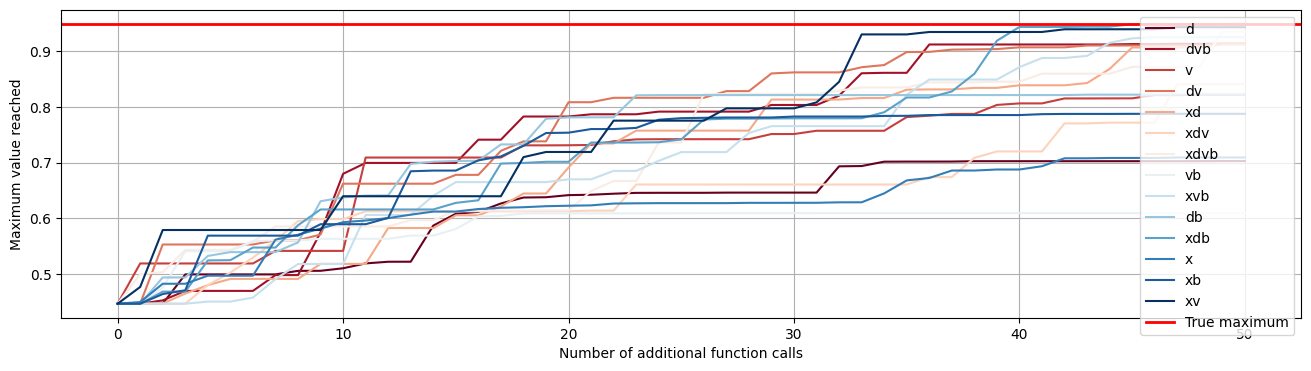

In [40]:
# list of colors interpolating between red and blue with as many colors as there are features
colors = plt.cm.get_cmap('RdBu', len(features))(range(len(features)))

fig, ax = plt.subplots(1, 1, figsize=(16, 4))
for feature in features:
    ax.plot(range(1 + n_steps), out[feature].mean(0), label=feature, color=colors[features.index(feature)])
    # ax.fill_between(range(1 + n_steps), out[feature].mean(0) - out[feature].std(0) / np.sqrt(5), out[feature].mean(0) + out[feature].std(0) / np.sqrt(5), alpha=0.3)
    
ax.axhline(f(x).max().item(), linewidth=2, color='r', label='True maximum')
ax.legend()
ax.set_xlabel("Number of additional function calls")
ax.set_ylabel("Maximum value reached")
ax.grid()

In [46]:
out_51 = {k: v[:, 50] for k, v in out.items()}
out_41 = {k: v[:, 40] for k, v in out.items()}
out_31 = {k: v[:, 30] for k, v in out.items()}
out_21 = {k: v[:, 20] for k, v in out.items()}

(0.7, 1.0)

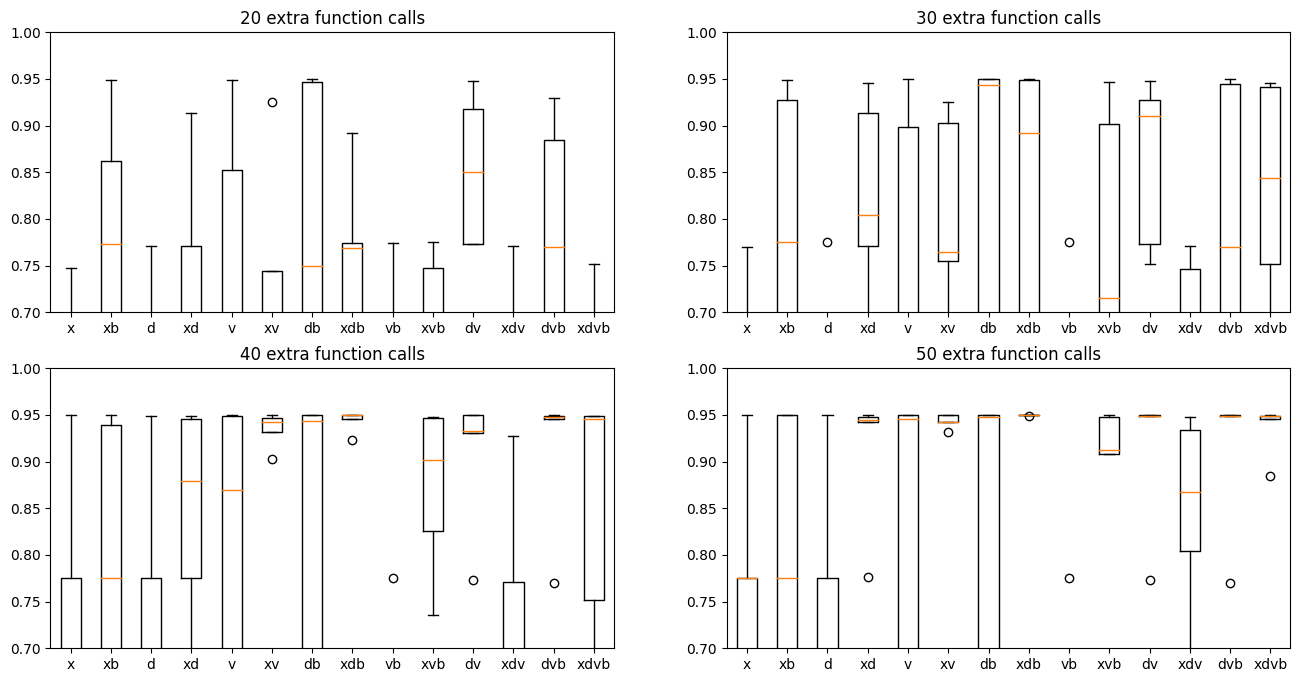

In [55]:
sorted_keys = ['x', 'xb', 'd', 'xd', 'v', 'xv', 'db', 'xdb', 'vb', 'xvb', 'dv', 'xdv', 'dvb', 'xdvb']
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes[1, 1].boxplot([out_51[k] for k in sorted_keys])
axes[1, 1].set_xticklabels(sorted_keys)
axes[1, 1].set_title("50 extra function calls")

axes[1, 0].boxplot([out_41[k] for k in sorted_keys])
axes[1, 0].set_xticklabels(sorted_keys)
axes[1, 0].set_title("40 extra function calls")

axes[0, 1].boxplot([out_31[k] for k in sorted_keys])
axes[0, 1].set_xticklabels(sorted_keys)
axes[0, 1].set_title("30 extra function calls")

axes[0, 0].boxplot([out_21[k] for k in sorted_keys])
axes[0, 0].set_xticklabels(sorted_keys)
axes[0, 0].set_title("20 extra function calls")

# set all the axes y lim to [0.7, 1]
axes[0, 0].set_ylim([0.7, 1])
axes[0, 1].set_ylim([0.7, 1])
axes[1, 0].set_ylim([0.7, 1])
axes[1, 1].set_ylim([0.7, 1])



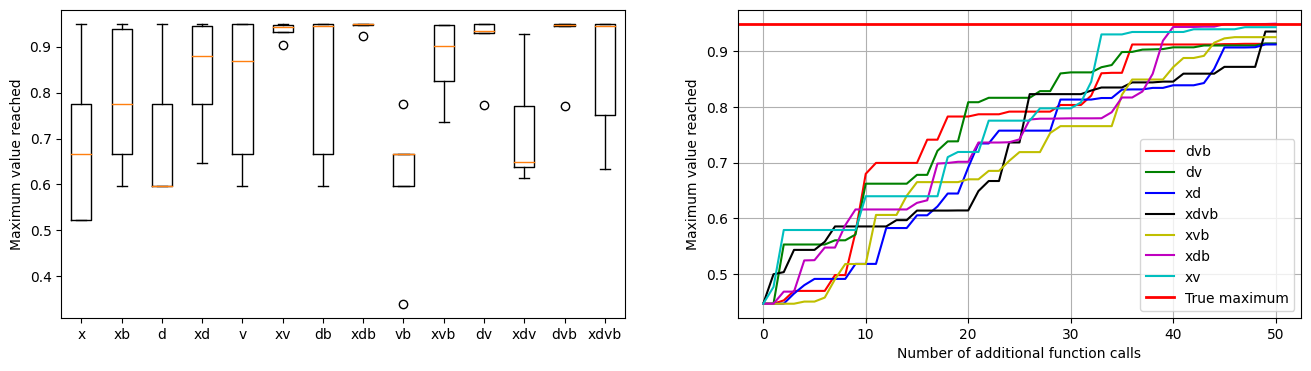

In [62]:
# list of colors interpolating between red and blue with as many colors as there are features
colors = 'rgbkymc'

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
i = 0
for feature in features:
    if out[feature].mean(0)[-1] > 0.9:
        axes[1].plot(range(1 + n_steps), out[feature].mean(0), label=feature, color=colors[i])
        i += 1
    # ax.fill_between(range(1 + n_steps), out[feature].mean(0) - out[feature].std(0) / np.sqrt(5), out[feature].mean(0) + out[feature].std(0) / np.sqrt(5), alpha=0.3)
    
axes[1].axhline(f(x).max().item(), linewidth=2, color='r', label='True maximum')
axes[1].legend()
axes[1].set_xlabel("Number of additional function calls")
axes[1].set_ylabel("Maximum value reached")
axes[1].grid()

axes[0].boxplot([out_41[k] for k in sorted_keys])
axes[0].set_xticklabels(sorted_keys)
axes[0].set_ylabel("Maximum value reached")

fig.savefig('figs/multioptima_boxplot.pdf', bbox_inches='tight')